In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_samples = 50

# Generate two clusters of data points
cluster_1 = np.random.normal(loc=[2, 2], scale=0.5, size=(n_samples // 2, 2))
cluster_2 = np.random.normal(loc=[-2, -2], scale=0.5, size=(n_samples // 2, 2))

# Combine the clusters into one dataset
X_small = np.vstack((cluster_1, cluster_2))
y_small = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))

# Combine features and labels into a single numpy array
dataset_small = np.hstack((X_small, y_small.reshape(-1, 1)))

# Display the dataset shape and first few rows
print("Dataset shape:", dataset_small.shape)
print("First 10 rows:\n", dataset_small[:10])

Dataset shape: (50, 3)
First 10 rows:
 [[1.83552269 1.90821877 0.        ]
 [1.63701114 1.85313539 0.        ]
 [1.51858573 2.10944663 0.        ]
 [2.90612594 1.49769224 0.        ]
 [1.42706023 1.96347495 0.        ]
 [1.5038346  1.83410036 0.        ]
 [2.59758666 1.77926663 0.        ]
 [1.41242514 2.08223439 0.        ]
 [2.65842182 1.91052932 0.        ]
 [1.36515963 1.99205114 0.        ]]


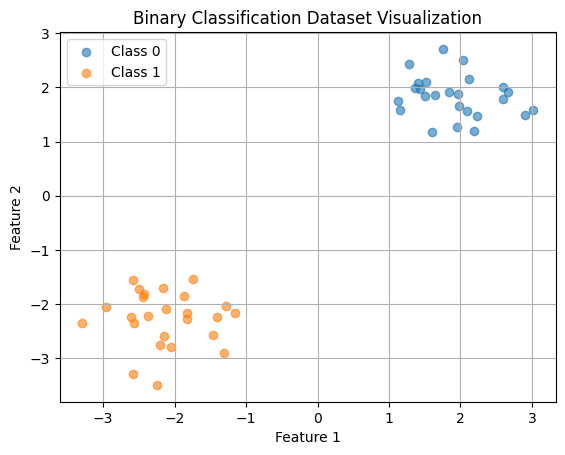

In [3]:
plt.scatter(X_small[y_small == 0, 0], X_small[y_small == 0, 1], label='Class 0', alpha=0.6)
plt.scatter(X_small[y_small == 1, 0], X_small[y_small == 1, 1], label='Class 1', alpha=0.6)
plt.title("Binary Classification Dataset Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

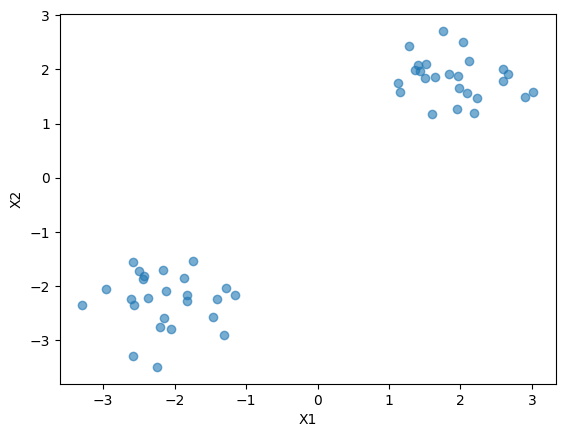

In [4]:
plt.scatter(X_small[:, 0], X_small[:, 1], alpha=.6)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [5]:
def calculate_distance(X, centroid):
    #X, centroid shape is (2,)
    return np.sqrt(np.sum((centroid-X)**2))

In [6]:
def average_indices(X):
    if len(X) == 0:  # Check to avoid division by zero
        return np.array([0, 0])  
    return np.mean(X, axis=0)

            

In [7]:
min_values = np.min(X_small, axis=0)
max_values = np.max(X_small, axis=0)

# Randomly generate centroids within the bounds of the data
centroid_1 = min_values + (max_values - min_values) * np.random.rand(2)
centroid_2 = min_values + (max_values - min_values) * np.random.rand(2)

# Combine into an array of centroids
initial_centroids = np.array([centroid_1, centroid_2])
print("Initial Centroids:\n", initial_centroids)

Initial Centroids:
 [[-0.0215805  -1.39436878]
 [ 1.04724772 -2.54820839]]


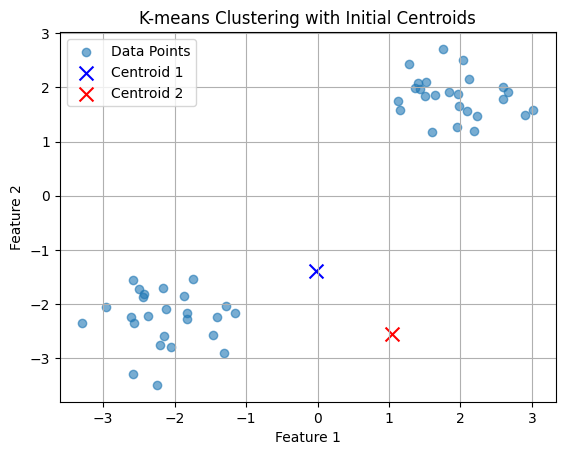

In [8]:
plt.scatter(X_small[:, 0], X_small[:, 1], alpha=0.6, label='Data Points')
plt.scatter(initial_centroids[0, 0], initial_centroids[0, 1], color='blue', marker='x', s=100, label='Centroid 1')
plt.scatter(initial_centroids[1, 0], initial_centroids[1, 1], color='red', marker='x', s=100, label='Centroid 2')

plt.title("K-means Clustering with Initial Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
red = []
blue = []
temp = []
for iterations in range(5):
    for i in range(len(X_small)):
        for j in range(2):
            temp.append(calculate_distance(X_small[i], initial_centroids[j]))
        if temp[0] < temp[1]:
            blue.append(X_small[i])
        else:
            red.append(X_small[i])
        temp.clear()
    red = np.array(red)
    blue = np.array(blue)
    initial_centroids[0]=average_indices(blue)
    initial_centroids[1]=average_indices(red)
    red = []
    blue = []



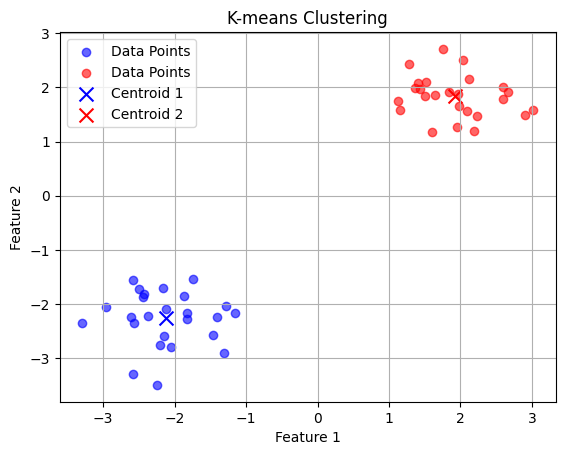

In [10]:
blue = []
red = []
for i in range(len(X_small)):
    if calculate_distance(X_small[i],initial_centroids[0])<calculate_distance(X_small[i],initial_centroids[1]):
        blue.append(X_small[i])
    else:
        red.append(X_small[i])
blue = np.array(blue)
red = np.array(red)
plt.scatter(blue[:, 0], blue[:, 1], alpha=0.6, color = 'blue', label='Data Points')
plt.scatter(red[:, 0], red[:, 1], alpha=0.6, color = 'red', label='Data Points')
plt.scatter(initial_centroids[0, 0], initial_centroids[0, 1], color='blue', marker='x', s=100, label='Centroid 1')
plt.scatter(initial_centroids[1, 0], initial_centroids[1, 1], color='red', marker='x', s=100, label='Centroid 2')

plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()